In [10]:
#ARIMAS
import sys
sys.path.append("../getData")
sys.path.append("../../visualization")
sys.path.append("../functions")
import bdStocks
import graficosJupyterNotebook as graficos
import numpy as np
import pandas as pd
import transformationsDataframes
pd.set_option('display.max_rows', None)
import scipy.stats
import statsmodels.stats.diagnostic
import statsmodels.api as sm
import math
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf
import warnings
warnings.filterwarnings("ignore")
max_lag=10

In [23]:
from scipy.stats import norm
sigma2=1
coef2=[]
coef=[0.4,0.4]
n=100
serie=np.zeros(n)
for i in range(len(coef)):
    serie[i]=1
acumulado=np.zeros(n)
for i in range(len(coef),len(serie)):
    acumulado[i]=norm.rvs()
    serie[i]+=acumulado[i]
    """for l in range(len(coef)):
        serie[i]+=serie[i-1-l]*coef[l]
    for l in range(len(coef2)):
         serie[i]+=coef2[l]*acumulado[i-1-l]"""
    serie[i]+=serie[i-1]*coef[0]+serie[i-4]*coef[1]+serie[i-5]*coef[0]*coef[1]
dti = pd.date_range("2018-01-01", periods=len(serie), freq="D")
serie=pd.DataFrame(serie)
serie.index=dti
serie_train=serie[0][:n-int(n*0.1)]
serie_test=serie [0][n-int(n*0.1):]
serie_train=pd.Series(serie_train).dropna()
serie_test=pd.Series(serie_test).dropna()
serie_train[0]=np.nan
serie_test[1]=np.nan
serie_train.head()
#serie_test.index=range(len(serie_train),len(serie_train)+len(serie_test))

2018-01-01         NaN
2018-01-02    1.000000
2018-01-03    1.258919
2018-01-04    1.740738
2018-01-05    1.618147
Freq: D, Name: 0, dtype: float64

In [24]:

serie_train.interpolate(method='linear')

2018-01-01         NaN
2018-01-02    1.000000
2018-01-03    1.258919
2018-01-04    1.740738
2018-01-05    1.618147
2018-01-06    0.588033
2018-01-07    1.944588
2018-01-08    1.711456
2018-01-09    0.864231
2018-01-10    0.122288
2018-01-11    0.333340
2018-01-12    1.347625
2018-01-13   -0.065559
2018-01-14    0.256629
2018-01-15    0.310836
2018-01-16    1.217541
2018-01-17   -0.687798
2018-01-18   -2.832880
2018-01-19   -1.831955
2018-01-20   -0.753867
2018-01-21   -1.469419
2018-01-22   -0.753179
2018-01-23   -2.438324
2018-01-24   -1.843692
2018-01-25   -1.197324
2018-01-26    0.105660
2018-01-27    0.510526
2018-01-28    0.063259
2018-01-29    0.754510
2018-01-30   -0.416015
2018-01-31    1.153561
2018-02-01    2.391214
2018-02-02    2.068740
2018-02-03    0.464651
2018-02-04    0.138235
2018-02-05    0.347009
2018-02-06    0.795550
2018-02-07    3.145102
2018-02-08    1.339312
2018-02-09   -0.540605
2018-02-10    1.379756
2018-02-11    1.820590
2018-02-12    1.749148
2018-02-13 

In [19]:
from statsmodels.tsa.stattools import adfuller
#la hipotesis nula es que hay raiz unitaria
diferenciacion=0
diferenciacionEstacional=0
estacional=True
paramFuller=5


adf=adfuller(serie_train,maxlag=max_lag)
adf
posibleEstacionaridad=False
diferenciacion=0
diferenciacionEstacional=0
if adf[1]>nivel_confianza:
    posibleEstacionaridad=True
    
if posibleEstacionaridad and estacional:
    serie1=pd.Series(serie_train).diff(periodicidad).dropna()
    adf1=adfuller(serie1,maxlag=max_lag)
if posibleEstacionaridad:
    serie2=pd.Series(serie_train).diff(1).dropna()
    adf2=adfuller(serie2,maxlag=max_lag)
    print(adf1,adf2)
if posibleEstacionaridad and estacional:
    for k in ["1%","5%"]:
        if adf2[0]<adf1[4][k]:
            if adf1[0]<adf1[4][k]:
                if adf1[1]<0.005:
                    diferenciacionEstacional=1
                    
                else:
                    diferenciacion=1
                  

            else:
                diferenciacion=1
                
            break
    if diferenciacion==0 and diferenciacionEstacional==0:
            serie3=pd.Series(serie1).diff(1).dropna()
            adf3=adfuller(serie3,maxlag=max_lag)
            print(adf3)
            if adf3[0]<adf3[4]["5%"]:
                diferenciacionEstacional=1
                diferenciacion=1
            else:
                serie_train=None

print(diferenciacion,diferenciacionEstacional)
        
import matplotlib.pyplot as plt
plt.plot(serie)

MissingDataError: exog contains inf or nans

99
0.10050378152592121
[9.94987437e+00 2.01102957e+00 2.31416072e+00 4.44921758e+00
 3.78253734e+00 1.78374075e+00 3.55717944e-01 2.94753302e+00
 1.13996802e+00 6.78860940e-01 1.44689157e+00 1.54809008e+00
 1.20483673e+00 5.10671119e-01 8.28250987e-01 5.83654664e-01
 3.66606220e-01 1.53824926e+00 1.44381434e+00 1.55006620e-01
 6.73114163e-01 1.99517973e+00 2.62589012e-03 8.08549005e-01
 1.37364104e+00 1.00193387e+00 1.30640609e+00 3.49985005e-01
 2.47109237e+00 3.95334540e-02] [9.94987437 2.03388218 2.90447378 6.64334095 1.27480008 0.76610829
 0.73413159 0.01241668 2.89711264 0.81827264 0.19186333 0.87253757
 1.07353796 0.51124251 0.82401524 2.5263182  2.6861982  0.31163612
 0.92399101 0.32604336 1.48401919 1.40167827 1.20673869 0.10612319
 1.21115919 2.14439509 0.87535692 3.05630175 0.76363235 1.02765876]
2.3263478740408408


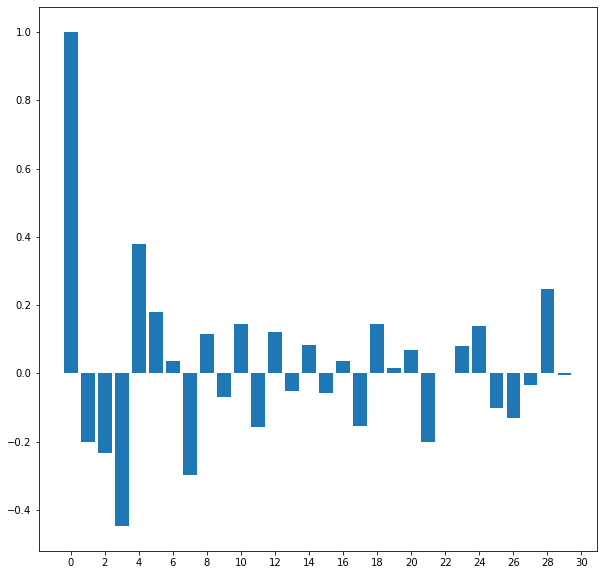

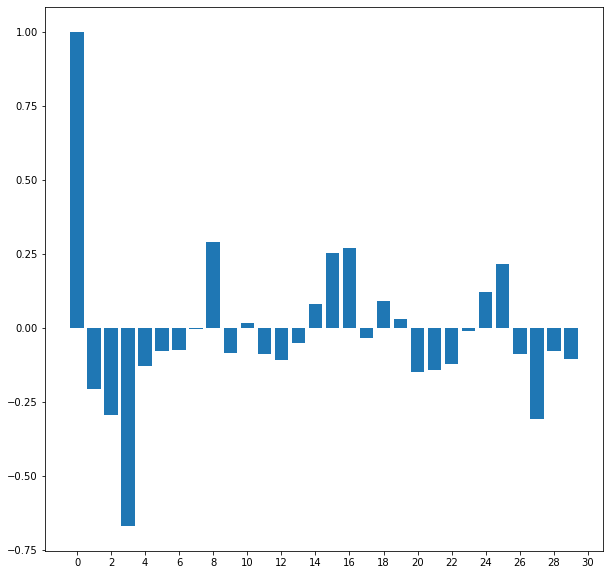

In [126]:
import scipy.stats
import statsmodels.stats.diagnostic
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
serie1=serie_train.copy()
if diferenciacion and  diferenciacionEstacional:
    serie1=serie_train.diff(periodicidad).diff(1)
elif diferenciacion:
    serie1=serie_train.diff(1)
elif diferenciacionEstacional:
    serie1=serie_train.diff(periodicidad)
serie1=serie1.dropna() 
corr=acf(serie1,nlags=int(len(serie1)/3))
pcorr=pacf(serie1,nlags=int(len(serie1)/3))
nivel=norm.ppf(0.99)
def devolverEstadisticos(corr,pcorr,diferenciacion,serie):
    T=len(serie)-diferenciacion
    print(T)
    varSerie=1/T
    desv=math.sqrt(varSerie)
    print(desv)
    return abs(corr)/desv,abs(pcorr)/desv
estCorr,estPcorr=(devolverEstadisticos(corr,pcorr,diferenciacion,serie))
print(estCorr,estPcorr)
print(nivel)
graficos.correlograma(corr,pcorr)

In [127]:
def contrasteCorrelacionResiduos(serie,diferenciacion,nivel_confianza):
    T=len(serie)-diferenciacion
    varSerie=1/T
    desv=math.sqrt(varSerie)
    nivel=norm.ppf(1-nivel_confianza/2)
    a= abs(serie)/desv<nivel

    return a

class Modelo:
    def __init__(self,modelo,modeloExtendido,significacionP=None,significacionQ=None,significacionPEst=None,significacionQEst=None):
        self.modelo=modelo
        self.modeloExtendido=modeloExtendido
        self.errorTrain=modelo.mse
        self.errorTest=modeloExtendido.mse
        self.aicTrain=modelo.aic
        self.aicTest=modeloExtendido.aic
        self.aicTotal=ponderaciones[0]+self.aicTrain+ponderaciones[1]*self.aicTest
        self.errorTotal=ponderaciones[0]+self.errorTrain*ponderaciones[1]*self.errorTest
        self.significacionP=significacionP
        self.significacionQ=significacionQ
        self.significacionPEst=significacionPEst
        self.significacionQEst=significacionQEst
def crearYProbarModelo(serie_train,serie_test,ordenes=None,ordenesSeason=None,diferenciacion=0,diferenciacionSeason=0,periodo=None):
    modelo=None
    notSeasonalTrend="c"
    seasonalTrend="c"
    if diferenciacion>0:
        notSeasonalTrend="t"
    if diferenciacionSeason>0:
        seasonalTrend="t"
        if ordenesSeason is None:
            ordenesSeason=(0,0)
        
    if  ordenes is not None:
        ordenes=(ordenes[0],diferenciacion,ordenes[1])
    if  ordenes is not None and ordenesSeason is not None:
        ordenesSeason=(ordenesSeason[0],diferenciacionSeason,ordenesSeason[1],periodo)
    if ordenesSeason is not None:
           ordenesSeason=(ordenesSeason[0],diferenciacionSeason,ordenesSeason[1],periodo)
    if  ordenes is not None and ordenesSeason is not None:   
        s="c"
        if notSeasonalTrend=="t" or  seasonalTrend=="t":
            s="t"
       
        modelo=ARIMA(endog=serie_train,order=ordenes,seasonal_order=ordenesSeason)
    elif ordenes is not None:
        modelo=ARIMA(endog=serie_train,order=ordenes,trend=notSeasonalTrend)
    elif ordenesSeason is not None:
        modelo=ARIMA(endog=serie_train,seasonal_order=ordenesSeason,trend= seasonalTrend)
    if modelo is not None:    
    
        adj=modelo.fit()
        adj2=adj.extend(serie_test.to_numpy())
        
        return adj,adj2

In [ ]:
from scipy.stats import norm
import itertools
import scipy.stats
import statsmodels.stats.diagnostic
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf

def reglas(serie_train,serie_test,estCorr,estPcorr,nivel_confianza,diferenciacion,diferenciacionSeason):
    nivel=norm.ppf(1-nivel_confianza/2)
    ordenesp={}
    ordenesq={}
    ordenespEstacional={}
    ordenesq={}
    ordenesqEstacional={}
    modelos={}
    for k in range(max_lag,0,-1): 
        if abs(estCorr[k])>nivel:

            ordenesp={i:norm.cdf(abs(estCorr[i]))-(1-norm.cdf(abs(estCorr[i]))) for i in range(1,k+1)}
            break

    for k in range(max_lag,0,-1): 
        if abs(estPcorr[k])>nivel:

            ordenesq={i:norm.cdf(abs(estPcorr[i]))-(1-norm.cdf(abs(estPcorr[i]))) for i in range(1,k+1)}
            break
        #ordenesq={1:0.5}
    v=4
    L=min(len(estCorr),v*periodicidad)  
    for k in range(L,periodicidad-1,-1): 
        if abs(estCorr[k])>nivel:
          
            l=int(k/periodicidad)
            if l not in  ordenesqEstacional.keys():
                ordenespEstacional[l]=norm.cdf(abs(estCorr[k]))-(1-norm.cdf(abs(estCorr[k])))
            

         
    for k in range(L,periodicidad-1,-1): 
     
       if abs(estPcorr[k])>nivel:
         
            l=int(k/periodicidad)
            if l not in  ordenesqEstacional.keys():
                ordenesqEstacional[l]=norm.cdf(abs(estCorr[k]))-(1-norm.cdf(abs(estCorr[k])))
          
        #ordenesq={1:0.5}
   
        
        
    lista=[]
    listaEstacional=[]
    if len(ordenesp.keys())>0 and len(ordenesq.keys())>0:
        grid=np.meshgrid(list(ordenesp.keys()),list(ordenesq.keys()))
        lista=[[grid[0][k][i],grid[1][k][i]] for k in range(len(grid[0])) for i in range(len(grid[0][k]))]
    elif len(ordenesp.keys())>0:
         lista=[[e,0] for e in ordenesp.keys() ]

    elif len(ordenesq.keys())>0:
         lista=[[0,e] for e in ordenesq.keys() ]
   
    if len(ordenespEstacional.keys())>0 and len(ordenesqEstacional.keys())>0:
        grid=np.meshgrid(list(ordenespEstacional.keys()),list(ordenesqEstacional.keys()))
        listaEstacional=[[grid[0][k][i],grid[1][k][i]] for k in range(len(grid[0])) for i in range(len(grid[0][k]))]
    elif len(ordenespEstacional.keys())>0:
         listaEstacional=[[e,0] for e in ordenespEstacional.keys() ]

    elif len(ordenespEstacional.keys())>0:
         listaEstacional=[[0,e] for e in ordenesqEstacional.keys() ]
    modelos=[]
    for orde in lista:
            if (diferenciacionSeason==0) or (diferenciacionSeason>0 and orde[0]<periodicidad and orde[1]<periodicidad):
                adj,adj2=crearYProbarModelo(serie_train,serie_test,ordenes=orde,ordenesSeason=None,diferenciacion=diferenciacion,diferenciacionSeason=diferenciacionSeason,periodo=periodicidad)
                sigP=None
                sigQ=None
                if orde[0]!=0:
                    sigP=   ordenesp[orde[0]]
                if orde[1]!=0:
                    sigQ= ordenesq[orde[1]]
                modelo=Modelo(adj,adj2, sigP,sigQ)
                modelos.append(modelo)
    
    for ordeEst in listaEstacional:
        
        adj,adj2=crearYProbarModelo(serie_train,serie_test,ordenes=None,ordenesSeason=ordeEst,diferenciacion=diferenciacion,diferenciacionSeason=diferenciacionSeason,periodo=periodicidad)   
        for orde in lista:
            if orde[0]<4 and orde[1]<4:
                #print(orde,ordeEst)
                adj,adj2=crearYProbarModelo(serie_train,serie_test,ordenes=orde,ordenesSeason=ordeEst,diferenciacion=diferenciacion,diferenciacionSeason=diferenciacionSeason,periodo=periodicidad)
                sigP=None
                sigQ=None
                if orde[0]!=0:
                    sigP=   ordenesp[orde[0]]
                if orde[1]!=0:
                    sigQ= ordenesq[orde[1]]
                sigPEst=None
                sigQEst=None
                if ordeEst[0]!=0:
                    sigPEst=   ordenespEstacional[ordeEst[0]]
                if ordeEst[1]!=0:
                    sigQESt= ordenesqEstacional[ordeEst[1]]
                modelo=Modelo(adj,adj2, sigP,sigQ, sigPEst,sigQEst)
                modelos.append(modelo)
       
    
    
    #print(listaEstacional)
    print(diferenciacionSeason)
    return modelos
    
    
diferenciacionEstacional=1
diferenciacion=1
modelos=reglas(serie_train,serie_test,estCorr,estPcorr,nivel_confianza,diferenciacion,diferenciacionEstacional)


In [ ]:
modelos.sort(key=lambda t:t.aicTotal)
import matplotlib.pyplot as plt
for modelo in modelos:
    #print(modelo.aicTotal,modelo.modelo.params,modelo.modelo.specification)
    #print(modelo.modelo.test_heteroskedasticity("breakvar",alternative= "two-sided"))
    #print(modelo.modelo.test_heteroskedasticity("breakvar",alternative= "increasing"))
    #print(modelo.modelo.test_normality(method="jarquebera"))
    u=(modelo.modelo.test_serial_correlation(method="ljungbox"))[0]
    dataframePred=modelo.modelo.get_forecast(len(serie_test)).summary_frame()
    dataframePred["real"]=serie_test   
    
    graficos.plot_forecast(serie_train,dataframePred,modelo.modeloExtendido.fittedvalues)